## Fitting drug response curves with sigmoid function

1. Test different fitting function:
2. visualise fitting and analyse errors
3. Make visualisation of absolute and relative methods of estimaton of IC50

In [1]:
import pandas as pd
import numpy as np


from tqdm import tqdm
import warnings
from fitting import *

warnings.filterwarnings("ignore")
_FOLDER = "data/"
_FOLDER_2 = "figures/"

In [2]:
import os
os.listdir("results")

['filt_auc_limit_02.csv',
 'filt_1234.csv',
 'filt_auc_limit_06.csv',
 'filt_123.csv',
 'filt_auc_limit_04.csv']

## Fitting data

In [3]:
df = pd.read_csv("results/filt_auc_limit_04.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'auc', 'spearman_r', 'count_missing'],
      dtype='object')

### sigmoid_4_param

In [4]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 24164/24164 [02:23<00:00, 168.56it/s]

R2>0: (16266, 33)
R2>0.9 14576
Number of samples with fitting <0.1: 1123

CPU times: user 2min 23s, sys: 631 ms, total: 2min 24s
Wall time: 2min 23s


## Visual Analysis of fitting efficiency

### All samples

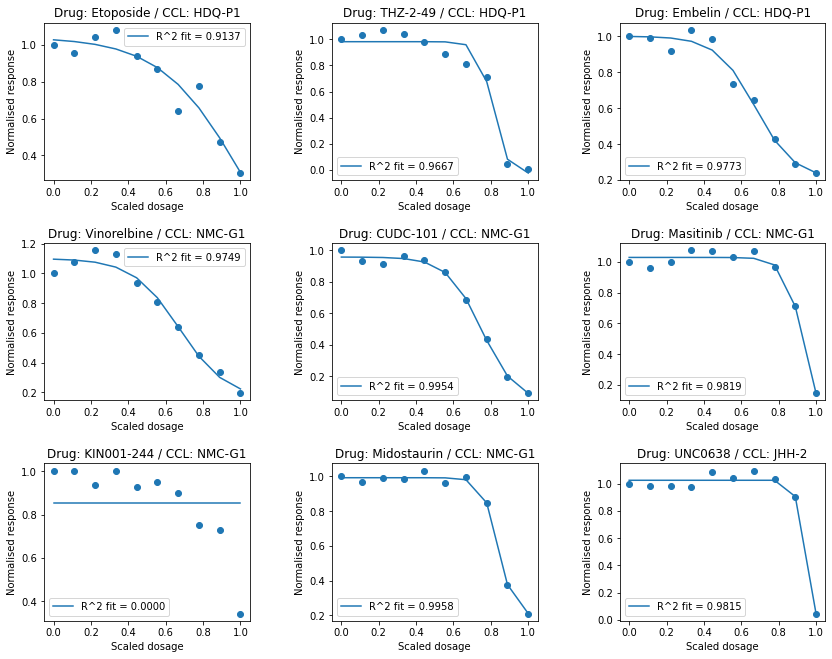

In [5]:
# ShowResponseCurvesWithFitting(df.drop(["drug_name", "CCL_name"],axis=1), plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
#                         indexes=df.index[:9],fitting_function = fitting_function, 
#                                   fitting_parameters =fitting_function)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### Bad fitting examples (examination after analysis of predictive models)

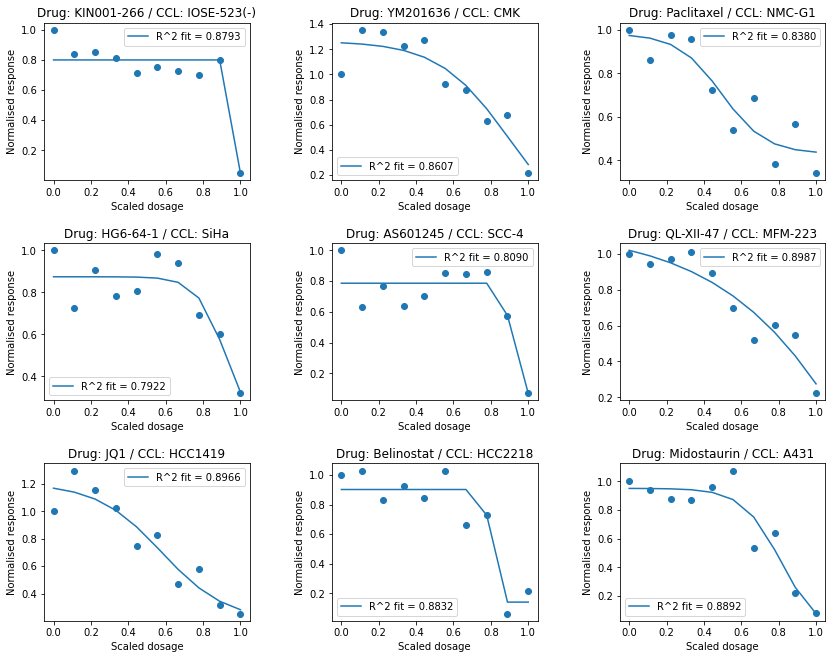

In [6]:
df2= df[(df[fitting_function+"_r2"]>0.1)& (df[fitting_function+"_r2"]<0.9)]

ShowResponseCurvesWithFitting(df2, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes= df2.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_2_param

100%|██████████| 16266/16266 [00:11<00:00, 1380.77it/s]


R2>0: (16266, 35)
R2>0.9 13071
CPU times: user 12 s, sys: 48.2 ms, total: 12 s
Wall time: 12 s


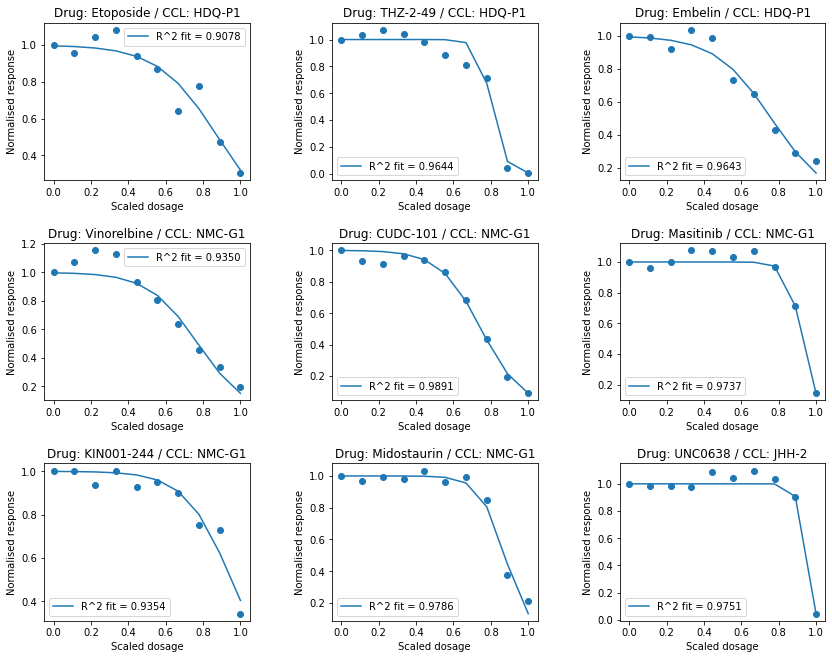

In [7]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 16266/16266 [00:18<00:00, 860.62it/s]


R2>0: (16243, 37)
R2>0.9 15090
CPU times: user 19.1 s, sys: 72.3 ms, total: 19.2 s
Wall time: 19.1 s


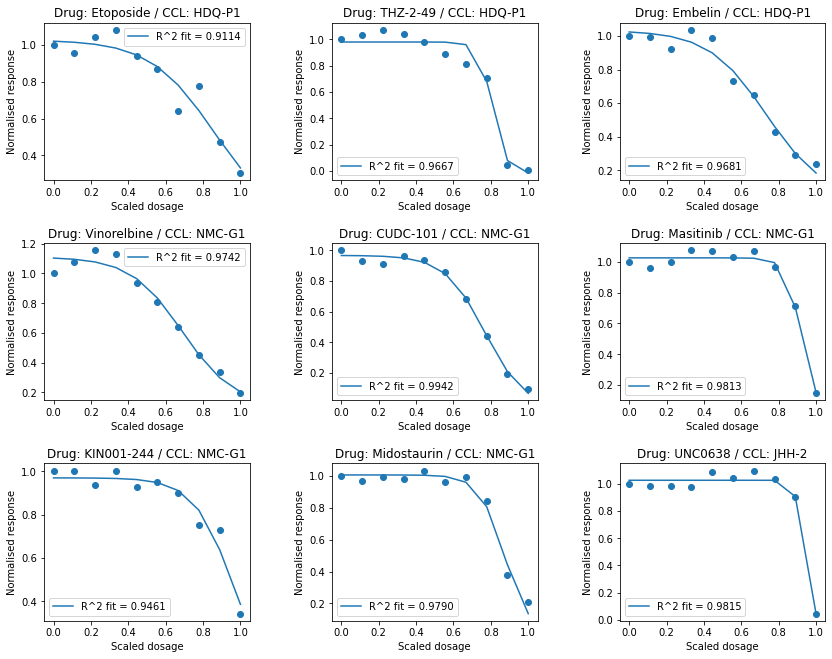

In [8]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 16243/16243 [00:12<00:00, 1279.90it/s]


(16241, 39)


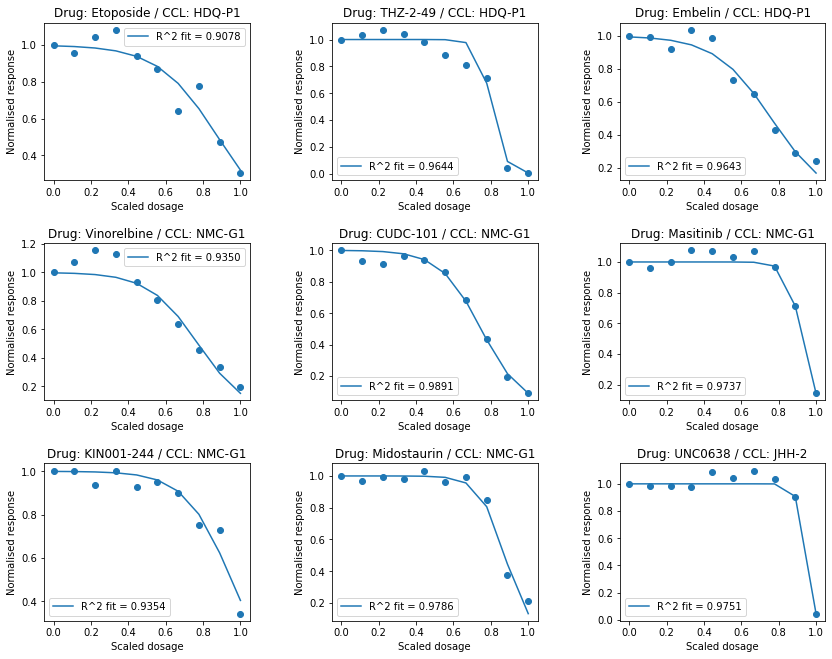

In [9]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 16241/16241 [00:41<00:00, 390.45it/s]


R2>0: (15639, 41)
R2>0.9 15036
CPU times: user 41.8 s, sys: 189 ms, total: 42 s
Wall time: 41.8 s


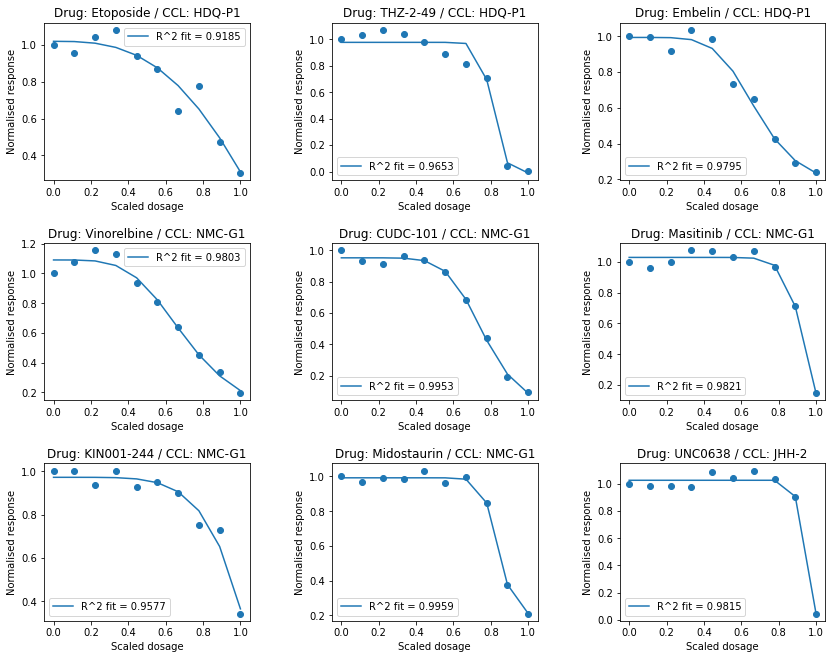

In [10]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

In [11]:
df[df["logistic_4_param_r2"]>0.9][["logistic_4_param", "logistic_4_param_r2"]]

,logistic_4_param,logistic_4_param_r2
0,"[1.0205169149147824, 2.925154319125563, 1.8405...",0.918497
1,"[0.9774450987355412, 24.96036737129365, 0.8071...",0.965288
2,"[0.9939963012005427, 5.822111084662747, 0.6879...",0.979466
3,"[1.090721306636655, 4.363214591513284, 0.71668...",0.980308
4,"[0.9519808581142127, 7.38988484774411, 0.76256...",0.995272
...,...,...
24159,"[1.0032846673195295, 3.236390981262378, 0.6537...",0.995870
24160,"[1.1018206230964294, 8.531235114652752, 1.0379...",0.961045
24161,"[1.1320770033098657, 6.563199675263988, 0.5562...",0.955328
24162,"[0.9526015592521225, 5.075363365719345, 5.0946...",0.937374


### LL4_4_param

100%|██████████| 15639/15639 [00:40<00:00, 389.05it/s]


R2>0: (15540, 43)
R2>0.9 14941
CPU times: user 40.4 s, sys: 241 ms, total: 40.7 s
Wall time: 40.4 s


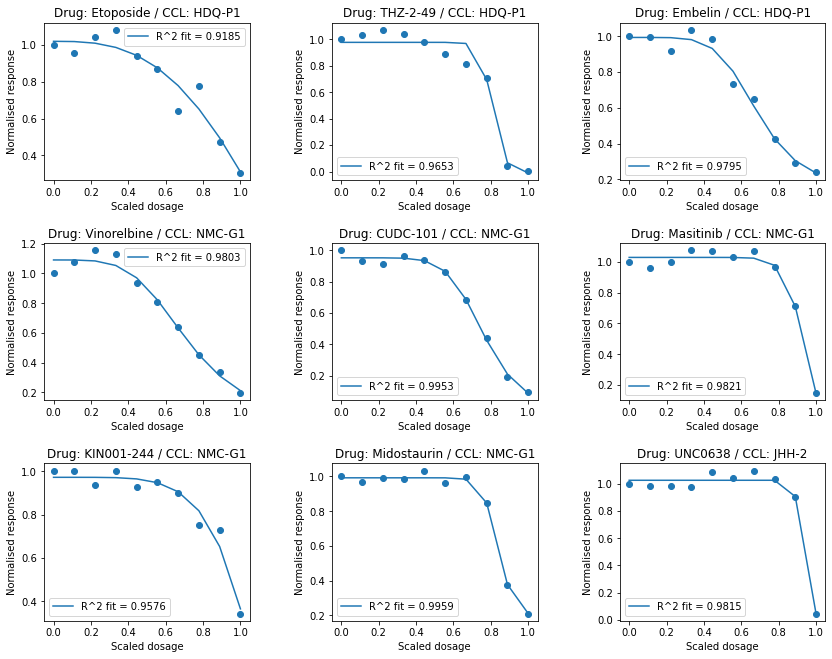

In [12]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 15540/15540 [00:40<00:00, 379.89it/s]


R2>0: (15077, 45)
R2>0.9 14509
CPU times: user 41.1 s, sys: 164 ms, total: 41.3 s
Wall time: 41.1 s


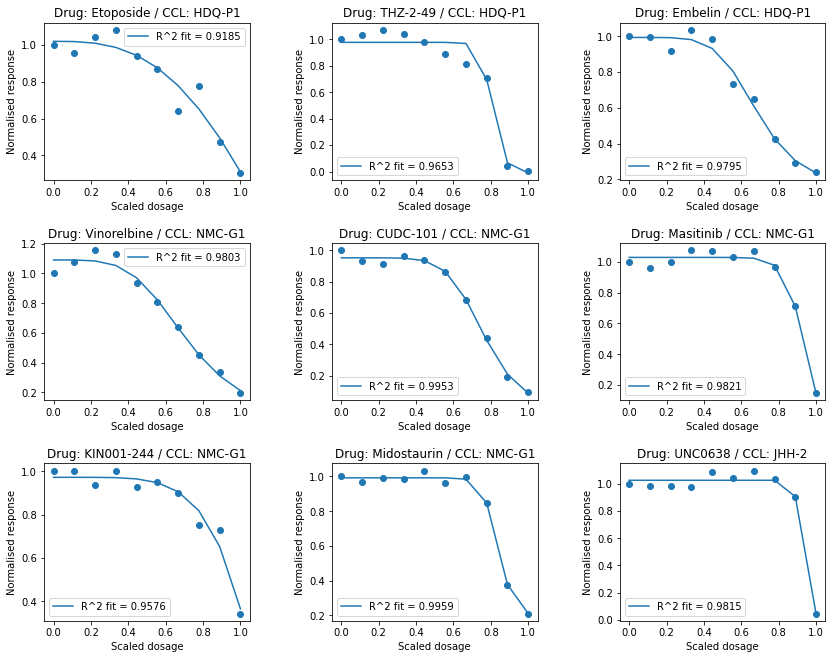

In [13]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 15077/15077 [00:40<00:00, 375.18it/s]


R2>0: (14733, 47)
R2>0.9 13113
CPU times: user 40.5 s, sys: 137 ms, total: 40.6 s
Wall time: 40.3 s


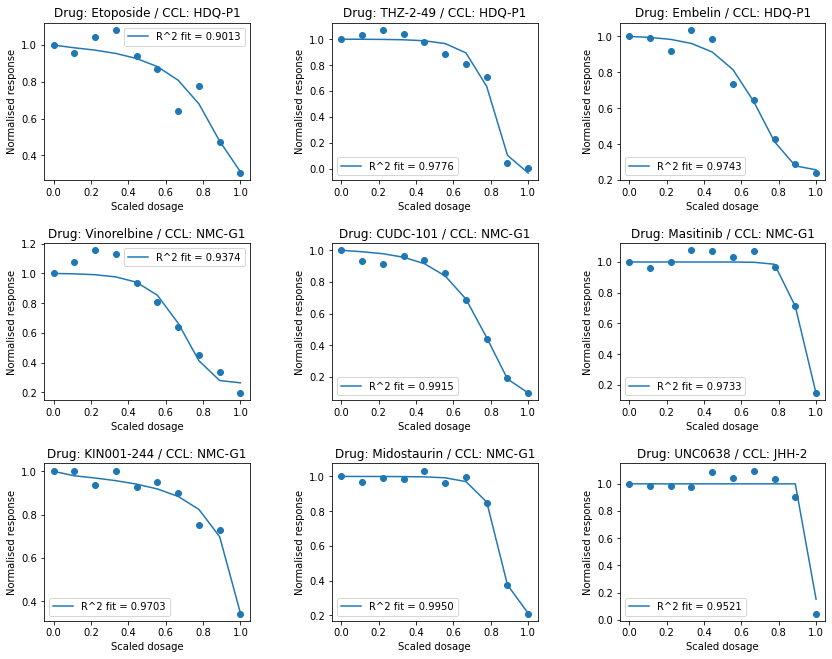

In [14]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [15]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [16]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,ll4R_4_param_r2,sigmoid_4_param_r2,logLogist_3_param_r2,sigmoid_3_param_r2,fsigmoid_r2,sigmoid_2_param_r2,ll4_4_param_r2,logistic_4_param_r2,better_fitting
0,0.918497,0.913683,0.901337,0.911393,0.907841,0.907841,0.918497,0.918497,ll4_4_param
1,0.965288,0.966718,0.977597,0.966673,0.964416,0.964416,0.965288,0.965288,logLogist_3_param
2,0.979466,0.977336,0.974261,0.968081,0.964311,0.964311,0.979466,0.979466,ll4R_4_param
3,0.980308,0.974905,0.937392,0.974226,0.935012,0.935012,0.980308,0.980308,ll4_4_param
4,0.995272,0.995441,0.991522,0.994160,0.989093,0.989093,0.995272,0.995272,sigmoid_4_param


In [17]:
df["better_fitting"].value_counts()

sigmoid_4_param      3918
ll4R_4_param         3253
ll4_4_param          2678
logistic_4_param     2563
logLogist_3_param    2274
sigmoid_3_param        47
Name: better_fitting, dtype: int64

In [18]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
logistic_4_param,7914
ll4R_4_param,7913
ll4_4_param,7913
sigmoid_4_param,7695
logLogist_3_param,5695
sigmoid_3_param,5481
fsigmoid,3612
sigmoid_2_param,3594


In [19]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
ll4R_4_param,12360
ll4_4_param,12360
logistic_4_param,12360
sigmoid_4_param,11935
sigmoid_3_param,10668
logLogist_3_param,10387
fsigmoid,8181
sigmoid_2_param,8146


In [20]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
ll4R_4_param,14211
ll4_4_param,14210
logistic_4_param,14210
sigmoid_3_param,13690
sigmoid_4_param,13625
logLogist_3_param,13113
fsigmoid,11919
sigmoid_2_param,11896


In [ ]:
df.to_csv